**Лабораторна робота №0. Аналіз даних із використанням Python**

Cтудентки групи КМ-11мн
#Коваленко Олександри

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

1. Відкрити файл з даними MVA_Vehicle_Sales_Counts_by_Month_for_CY_2002_-_2017_Up_to_June.csv

In [ ]:
file_url = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/MVA_Vehicle_Sales_Counts_by_Month_for_CY_2002_-_2017_Up_to_June.csv"
df = pd.read_csv(file_url)
df

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,$755015820,$386481929
1,2002,FEB,27520,50982,$664454223,$361353242
2,2002,MAR,34225,58794,$805666244,$419385387
3,2002,APR,36452,59817,$846368297,$433061150
4,2002,MAY,37359,60577,$855005784,$442569410
...,...,...,...,...,...,...
181,2017,FEB,22413,55989,$776222008,$592255229
182,2017,MAR,27838,72717,$926703144,$744746293
183,2017,APR,26135,62740,$867722291,$654981615
184,2017,MAY,28931,68296,$937804113,$718689038


2. Вивести на екран K+N перших записів з цього файлу, де K – це порядковий номер першої літери імені, N – порядковий номер другої літери прізвища.

In [ ]:
letters = "aбвгдеєжзиіїйклмнопрстуфхцчшщьюя" #алфавіт у вигляді рядка
surname = "Коваленко" #прізвище
name = "Олесандра" #ім'я
K = 18
N = 18
df.head(K+N)

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,$755015820,$386481929
1,2002,FEB,27520,50982,$664454223,$361353242
2,2002,MAR,34225,58794,$805666244,$419385387
3,2002,APR,36452,59817,$846368297,$433061150
4,2002,MAY,37359,60577,$855005784,$442569410
5,2002,JUN,36348,55415,$830251613,$414731166
6,2002,JUL,30367,55235,$700530891,$384673023
7,2002,AUG,38965,60310,$934484212,$455453720
8,2002,SEP,39740,55485,$950502055,$432112270
9,2002,OCT,35276,58020,$865326154,$456738532


3. Обчислити та вивести:

a. загальну кількість транспортних засобів, проданих у 20YY році, де дві останні цифри YY визначаються як збільшений на 3 залишок від ділення порядкового номеру першої літери прізвища на 15

In [ ]:
N=14
YY = N % 15 + 3 + 2000
year = df[df['Year '] == YY]
total = year.sum(axis=0)
total = total['New'] + total['Used']
total

550131

b. середній дохід від продажу б/в транспортних засобів в місяці (М %% 12) + 1, де М – це порядковий номер у списку групи, a %% b - ділення a за модулем b

In [ ]:
M = 9
month = ( M % 12 ) + 1
month

10

In [ ]:
df[df["Month "] == 'OCT']["Total Sales Used"].apply(lambda x: float(x.replace('$',''))).mean()

496450506.4

4. Побудувати на одному графіку:

a. середню вартість одного нового транспортного засобу в місяці (М+3) %% 4 + 1

In [ ]:
month_4a = ( M + 3 ) % 4 + 1
month_4a

1

In [ ]:
month_4a = df[df["Month "] == "JAN"]
mean_new_price = sum(month_4a["Total Sales New"].apply(lambda x: float(x.replace('$',''))))/sum(month_4a["New"])
mean_new_price

29158.097080955373

b. середню вартість одного б/в транспортного засобу в місяці (М+3) %% 4 + 1

In [ ]:
mean_used_price = sum(month_4a["Total Sales Used"].apply(lambda x: float(x.replace('$','')))) / sum(month_4a["Used"])
mean_used_price

9114.233171926837

Text(0.5, 1.0, 'Mean price JAN')

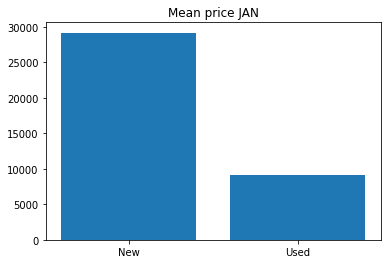

In [ ]:
plt.bar(['New', 'Used'],[mean_new_price, mean_used_price])
plt.title("Mean price JAN")

5. 
    a. Створіть нову змінну в датасеті, яка показує загальну кількість проданих автомобілів по місяцю. Назвіть цю змінну All. 

    b. Створіть нову змінну в датасеті, яка показує загальний дохід по всіх проданих автомобілях по місяцю. Назвіть цю змінну Total Sales All.
    
    c. Згрупуйте датасет за змінною Month і знайдіть суму, мінімум, максимум, середнє значення (mean), стандартне відхилення (standard deviation), медіану для змінних All, New,	Used,	Total Sales New,	Total Sales Used, Total Sales All. Результати агрегації знайдіть, використовуючи один метод і подайте у вигляді одного датафрейму.

    d. Візуалізуйте результати агрегацій для місяцю (М %% 5) + 1 та будь-яких інших трьох місяців з датасету на одному графіку. Проаналізуйте отримані графіки.

In [ ]:
df['Total Sales New'] = df['Total Sales New'].apply(lambda x: float(x.replace('$','')))
df['Total Sales Used'] = df['Total Sales Used'].apply(lambda x: float(x.replace('$','')))

### 5.a

In [ ]:
df['All'] = df['Used']+df['New']
df.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used,All
0,2002,JAN,31106,49927,755015820.0,386481929.0,81033
1,2002,FEB,27520,50982,664454223.0,361353242.0,78502
2,2002,MAR,34225,58794,805666244.0,419385387.0,93019
3,2002,APR,36452,59817,846368297.0,433061150.0,96269
4,2002,MAY,37359,60577,855005784.0,442569410.0,97936


### 5.b

In [ ]:
df['Total Sales All'] = df['Total Sales New']+df['Total Sales Used']
df

,Year,Month,New,Used,Total Sales New,Total Sales Used,All,Total Sales All
0,2002,JAN,31106,49927,7.550158e+08,386481929.0,81033,1.141498e+09
1,2002,FEB,27520,50982,6.644542e+08,361353242.0,78502,1.025807e+09
2,2002,MAR,34225,58794,8.056662e+08,419385387.0,93019,1.225052e+09
3,2002,APR,36452,59817,8.463683e+08,433061150.0,96269,1.279429e+09
4,2002,MAY,37359,60577,8.550058e+08,442569410.0,97936,1.297575e+09
...,...,...,...,...,...,...,...,...
181,2017,FEB,22413,55989,7.762220e+08,592255229.0,78402,1.368477e+09
182,2017,MAR,27838,72717,9.267031e+08,744746293.0,100555,1.671449e+09
183,2017,APR,26135,62740,8.677223e+08,654981615.0,88875,1.522704e+09
184,2017,MAY,28931,68296,9.378041e+08,718689038.0,97227,1.656493e+09


### 5.c

In [ ]:
aggregations = ['sum', 'min', 'max', 'mean', 'std','var']
res = df[['Month ', 'All', 'New', 'Used','Total Sales New', 'Total Sales Used', 'Total Sales All']].groupby('Month ').agg(aggregations)
res

All                 ... Total Sales All                            
            sum    min     max  ...            mean           std           var
Month                           ...                                            
APR     1466716  76536  101537  ...    1.350639e+09  1.789251e+08  3.201418e+16
AUG     1383367  77683  115136  ...    1.406379e+09  2.215463e+08  4.908277e+16
DEC     1088165  59831   85654  ...    1.182356e+09  2.191896e+08  4.804408e+16
FEB     1154443  53741   82441  ...    1.056119e+09  1.811288e+08  3.280764e+16
JAN     1209726  59217   85410  ...    1.251481e+09  2.097591e+08  4.399889e+16
JUL     1342629  73703  103899  ...    1.361707e+09  2.215741e+08  4.909509e+16
JUN     1492278  81241  107831  ...    1.423217e+09  2.179888e+08  4.751914e+16
MAR     1478849  74792  108106  ...    1.330745e+09  2.120491e+08  4.496481e+16
MAY     1447290  70930  100611  ...    1.347610e+09  2.147897e+08  4.613461e+16
NOV     1111276  56645   84513  ...    1.150650e+09  1.901742e+08  3.616622e+16
OCT     1285225  71500  101014  ...    1.320444e+09  2.045463e+08  4.183917e+16
SEP     1324154  75334  101850  ...    1.375404e+09  1.976088e+08  3.904922e+16

[12 rows x 36 columns]

### 5.d

In [ ]:
month_5d = (M % 5) + 1
month_5d


5

6. Візуалізуйте, використовуючи методи бібліотеки Pandas і датафрейм з агрегованими даними:

    а. зміну середньомісячного доходу по всім автомобілям;

    b. зміну місячної медіани кількості всіх проданих автомобілів;
    
    c. зміну мінімального і максимального середньомісячного доходу від продажу нових автомобілів

Проаналізуйте отримані результати.



###6.a

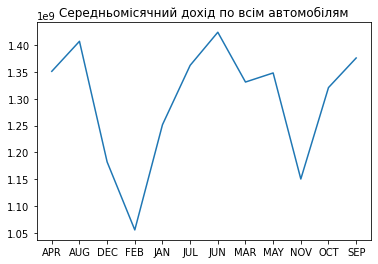

In [ ]:
res_a = res["Total Sales All"]
res_a = res_a["mean"]
plt.plot(res_a)
plt.title("Cередньомісячний дохід по всім автомобілям")
plt.show()

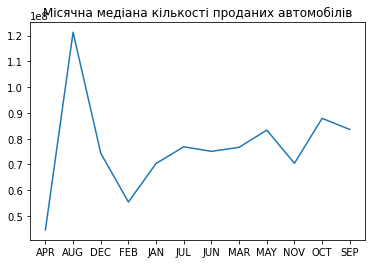

In [ ]:
res_b = res["All"]
res_b = res_b["var"]
plt.plot(res_b)
plt.title("Місячна медіана кількості проданих автомобілів")
plt.show()

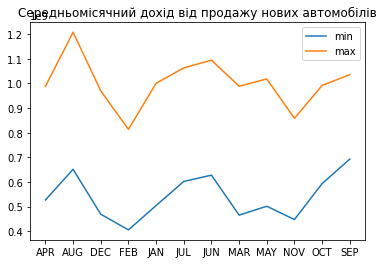

In [ ]:
res_c = res["Total Sales New"]
x1 = res_c[['min']]
x2 = res_c[['max']]
plt.plot(x1, label = 'min')
plt.plot(x2, label = 'max')
plt.title("Середньомісячний дохід від продажу нових автомобілів")
plt.legend()
plt.show()

7. Побудуйте на двох різних графіках наступні дані для року 20YY:
    
    7.1. місячний дохід по всім автомобілям і по новим;
    
    7.2  місячну кількість всіх проданих автомобілів і нових проданих автомобілів.

    7.3. Обчисліть також середнє значення, стандартне відхилення, медіану, мінімальне і максимальне значення вказаних в 7.1 і 7.2 даних для року 20YY

    Проаналізуйте отримані результати.

In [ ]:
year = df[df['Year '] == YY]

###7.1

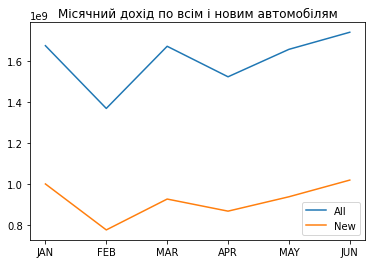

In [ ]:
plt.plot(year['Month '],year["Total Sales All"], label = 'All')
plt.plot(year['Month '], year["Total Sales New"], label = 'New')
plt.title("Місячний дохід по всім і новим автомобілям")
plt.legend()
plt.show()


###7.2

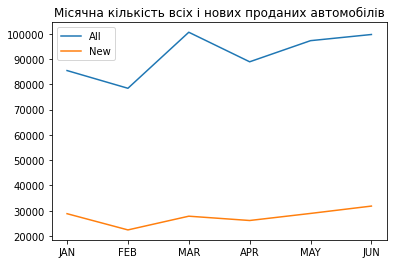

In [ ]:
plt.plot(year['Month '],year["All"], label = 'All')
plt.plot(year['Month '], year["New"], label = 'New')
plt.title("Місячна кількість всіх і нових проданих автомобілів")
plt.legend()
plt.show()

###7.3

In [ ]:
aggregations = [ 'mean', 'std', 'var', 'min', 'max']
result = year[['Year ', 'All', 'New', 'Total Sales Used', 'Total Sales All']].groupby('Year ').agg(aggregations)
result

All               ... Total Sales All              
          mean          std  ...             min           max
Year                         ...                              
2017   91688.5  8907.670105  ...    1.368477e+09  1.739893e+09

[1 rows x 20 columns]

In [ ]:
chart_df = result.loc[[2017]]
chart_df

All               ... Total Sales All              
          mean          std  ...             min           max
Year                         ...                              
2017   91688.5  8907.670105  ...    1.368477e+09  1.739893e+09

[1 rows x 20 columns]

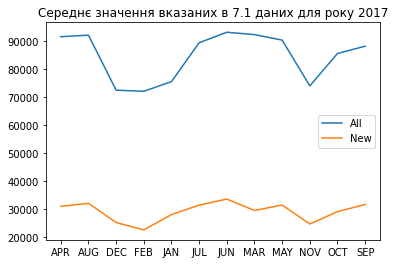

In [ ]:
res_a = res["All"]
res_b = res["New"]

plt.plot(res_a[['mean']], label = 'All')
plt.plot(res_b[['mean']], label = 'New')

plt.title("Середнє значення вказаних в 7.1 даних для року 2017")
plt.legend()
plt.show()

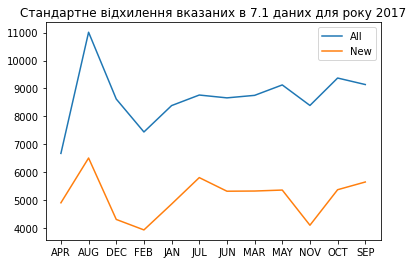

In [ ]:
plt.plot(res_a[['std']], label = 'All')
plt.plot(res_b[['std']], label = 'New')

plt.title("Cтандартне відхилення вказаних в 7.1 даних для року 2017")
plt.legend()
plt.show()

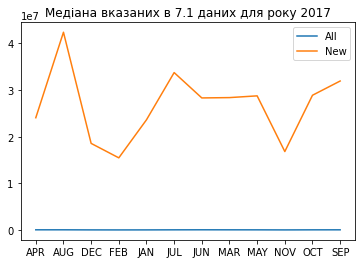

In [ ]:
plt.plot(res_a[['min']], label = 'All')
plt.plot(res_b[['var']], label = 'New')

plt.title("Медіана вказаних в 7.1 даних для року 2017")
plt.legend()
plt.show()

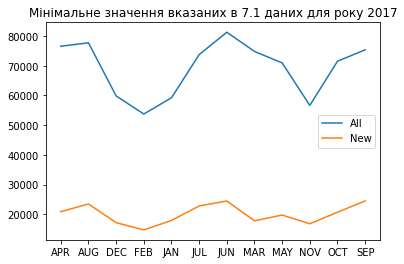

In [ ]:
plt.plot(res_a[['min']], label = 'All')
plt.plot(res_b[['min']], label = 'New')

plt.title("Мінімальне значення вказаних в 7.1 даних для року 2017")
plt.legend()
plt.show()

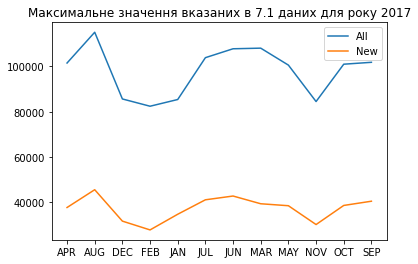

In [ ]:
plt.plot(res_a[['max']], label = 'All')
plt.plot(res_b[['max']], label = 'New')

plt.title("Максимальне значення вказаних в 7.1 даних для року 2017")
plt.legend()
plt.show()

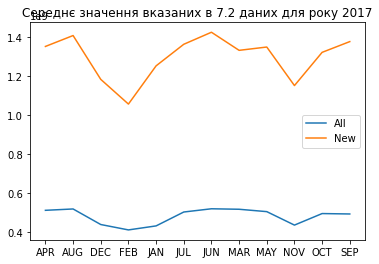

In [ ]:
res_a = res['Total Sales Used']
res_b = res['Total Sales All']

plt.plot(res_a[['mean']], label = 'All')
plt.plot(res_b[['mean']], label = 'New')

plt.title("Середнє значення вказаних в 7.2 даних для року 2017")
plt.legend()
plt.show()

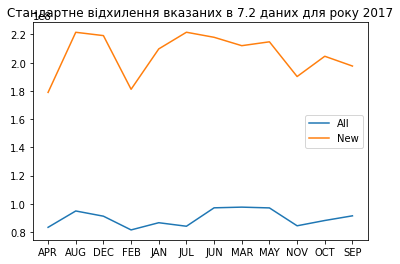

In [ ]:
plt.plot(res_a[['std']], label = 'All')
plt.plot(res_b[['std']], label = 'New')

plt.title("Cтандартне відхилення вказаних в 7.2 даних для року 2017")
plt.legend()
plt.show()

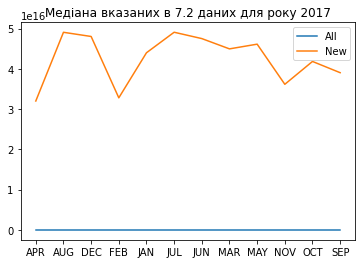

In [ ]:
plt.plot(res_a[['min']], label = 'All')
plt.plot(res_b[['var']], label = 'New')

plt.title("Медіана вказаних в 7.2 даних для року 2017")
plt.legend()
plt.show()

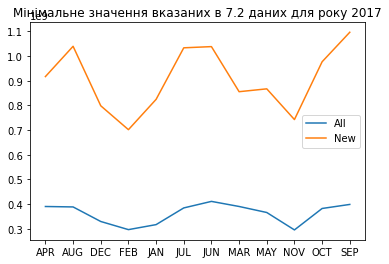

In [ ]:
plt.plot(res_a[['min']], label = 'All')
plt.plot(res_b[['min']], label = 'New')

plt.title("Мінімальне значення вказаних в 7.2 даних для року 2017")
plt.legend()
plt.show()

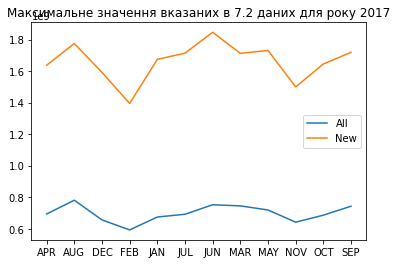

In [ ]:
plt.plot(res_a[['max']], label = 'All')
plt.plot(res_b[['max']], label = 'New')

plt.title("Максимальне значення вказаних в 7.2 даних для року 2017")
plt.legend()
plt.show()